In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [86]:
file_path = 'Uterine Corpus Endometrial Carcinoma.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display basic information about the numeric columns
numeric_columns = ['Mutation Count', 'Fraction Genome Altered', 'Diagnosis Age', 'MSI MANTIS Score', 'MSIsensor Score']
print("Summary Statistics for Numeric Columns:")
print(df[numeric_columns].describe())




Summary Statistics for Numeric Columns:
       Mutation Count  Fraction Genome Altered  Diagnosis Age  \
count      515.000000               519.000000      526.00000   
mean      1046.423301                 0.185959       63.76616   
std       2734.365494                 0.226088       11.06003   
min          7.000000                 0.000000       31.00000   
25%         47.000000                 0.003600       57.00000   
50%         76.000000                 0.067800       64.00000   
75%        563.500000                 0.314450       71.00000   
max      25696.000000                 0.948700       90.00000   

       MSI MANTIS Score  MSIsensor Score  
count        526.000000       528.000000  
mean           0.438948         6.395890  
std            0.239666        10.175853  
min            0.237000         0.000000  
25%            0.283950         0.110000  
50%            0.311300         0.435000  
75%            0.543225        10.117500  
max            1.304900       

In [88]:
ColumToEncode = df.columns
ColumToEncode 


Index(['Patient ID', 'Sample ID', 'Cancer Type Detailed',
       'Overall Survival Status', 'Disease Free Status',
       'Disease-specific Survival status', 'Mutation Count',
       'Fraction Genome Altered', 'Diagnosis Age', 'MSI MANTIS Score',
       'MSIsensor Score', 'Race Category', 'Subtype', 'Tumor Type'],
      dtype='object')

In [89]:
df = df.drop(['Patient ID','Sample ID','Race Category'], axis = 1)

In [90]:
df['Fraction Genome Altered'] = df['Fraction Genome Altered'].fillna(0)

In [91]:
df.loc[df['MSI MANTIS Score'] > 0.5415, 'Subtype'] = 'Subtype_UCEC_MSI'
df.loc[df['Mutation Count'] > 551.5, 'Subtype'] = 'Subtype_UCEC_POLE'

# Fill the remaining null values with 'Subtype_UCEC_CN_LOW'
df['Subtype'].fillna('Subtype_UCEC_CN_LOW', inplace=True)

# Check for null values after imputation
null_values_after_imputation = df.isnull().sum()
print("Null values after imputation:")
print(null_values_after_imputation)

Null values after imputation:
Cancer Type Detailed                  0
Overall Survival Status               0
Disease Free Status                 115
Disease-specific Survival status      2
Mutation Count                       14
Fraction Genome Altered               0
Diagnosis Age                         3
MSI MANTIS Score                      3
MSIsensor Score                       1
Subtype                               0
Tumor Type                            0
dtype: int64


In [92]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [93]:
imputer = SimpleImputer(strategy='median')
df['Diagnosis Age'] = imputer.fit_transform(df[['Diagnosis Age']])

In [94]:
imputer_mean = SimpleImputer(strategy='mean')
df['MSIsensor Score'] = imputer_mean.fit_transform(df[['MSIsensor Score']]) 
df['MSI MANTIS Score'] = imputer_mean.fit_transform(df[['MSI MANTIS Score']])

In [95]:
df['Mutation Count'] = df.groupby('Subtype')['Mutation Count'].transform(lambda x: x.fillna(x.mean()))

In [96]:
To_Encode = ['Cancer Type Detailed', 'Overall Survival Status', 'Disease Free Status', 'Disease-specific Survival status', 'Subtype', 'Tumor Type']
Enconder_columns = LabelEncoder()

for columns in To_Encode:
    if columns in ColumToEncode:
        df[columns] = Enconder_columns.fit_transform(df[columns])

In [97]:
mutation_count_stats = df['Mutation Count'].describe()
msi_mantis_stats = df['MSI MANTIS Score'].describe()

print("Mutation Count Statistics:")
print(mutation_count_stats)

print("\nMSI MANTIS Score Statistics:")
print(msi_mantis_stats)

Mutation Count Statistics:
count      529.000000
mean      1024.131897
std       2701.419995
min          7.000000
25%         47.000000
50%         75.000000
75%        546.000000
max      25696.000000
Name: Mutation Count, dtype: float64

MSI MANTIS Score Statistics:
count    529.000000
mean       0.438948
std        0.238985
min        0.237000
25%        0.284100
50%        0.311600
75%        0.541500
max        1.304900
Name: MSI MANTIS Score, dtype: float64


In [98]:
print(df.isnull().sum())

Cancer Type Detailed                0
Overall Survival Status             0
Disease Free Status                 0
Disease-specific Survival status    0
Mutation Count                      0
Fraction Genome Altered             0
Diagnosis Age                       0
MSI MANTIS Score                    0
MSIsensor Score                     0
Subtype                             0
Tumor Type                          0
dtype: int64


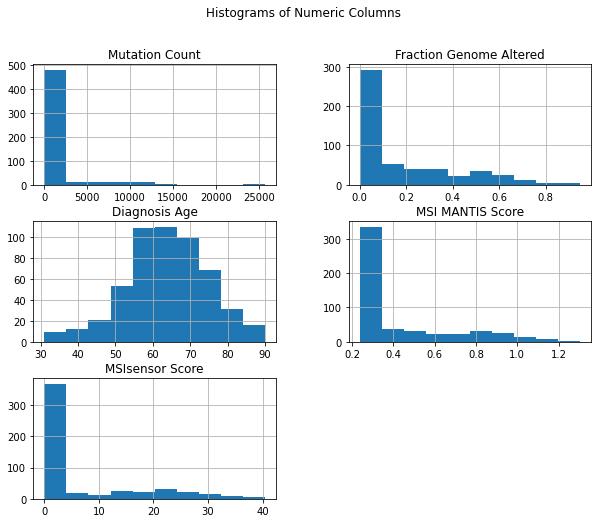

In [99]:
# Create histograms for numeric columns
df[numeric_columns].hist(figsize=(10, 8))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

In [101]:
print("\nCorrelation Matrix:")
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)


Correlation Matrix:
                         Mutation Count  Fraction Genome Altered  \
Mutation Count                 1.000000                -0.222901   
Fraction Genome Altered       -0.222901                 1.000000   
Diagnosis Age                 -0.186146                 0.258959   
MSI MANTIS Score               0.090257                -0.321097   
MSIsensor Score                0.089587                -0.345453   

                         Diagnosis Age  MSI MANTIS Score  MSIsensor Score  
Mutation Count               -0.186146          0.090257         0.089587  
Fraction Genome Altered       0.258959         -0.321097        -0.345453  
Diagnosis Age                 1.000000         -0.043262        -0.028341  
MSI MANTIS Score             -0.043262          1.000000         0.940410  
MSIsensor Score              -0.028341          0.940410         1.000000  


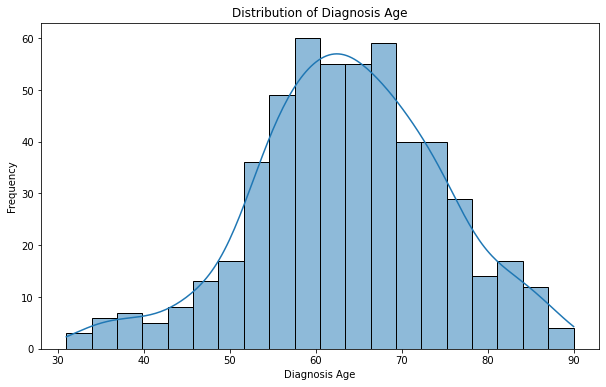

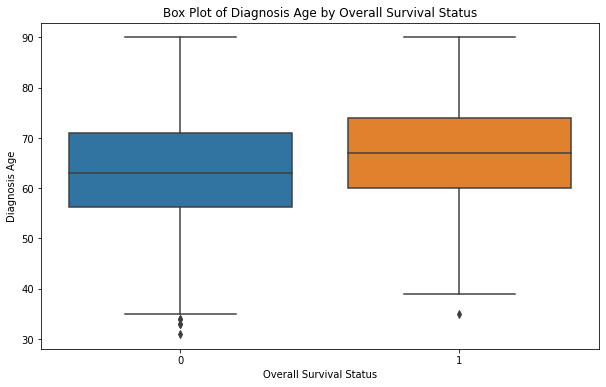

In [102]:
age_column = 'Diagnosis Age'

# Plot a histogram of Diagnosis Age
plt.figure(figsize=(10, 6))
sns.histplot(df[age_column], bins=20, kde=True)
plt.title('Distribution of Diagnosis Age')
plt.xlabel('Diagnosis Age')
plt.ylabel('Frequency')
plt.show()

# Box plot to visualize the spread of Diagnosis Age by Overall Survival Status
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Overall Survival Status'], y=df[age_column])
plt.title('Box Plot of Diagnosis Age by Overall Survival Status')
plt.xlabel('Overall Survival Status')
plt.ylabel('Diagnosis Age')
plt.show()

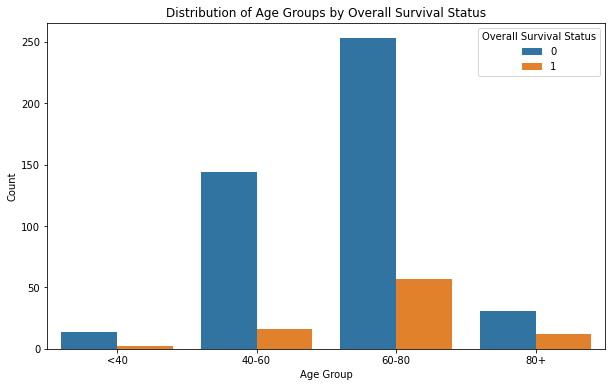

In [103]:
# Create age groups
bins = [0, 40, 60, 80, 100]
labels = ['<40', '40-60', '60-80', '80+']
df['Age Group'] = pd.cut(df['Diagnosis Age'], bins=bins, labels=labels, right=False)

# Visualize the distribution of age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Overall Survival Status', data=df)
plt.title('Distribution of Age Groups by Overall Survival Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


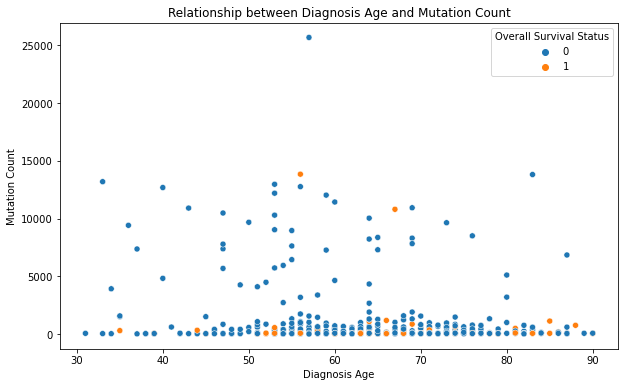


Correlation Matrix:
                Diagnosis Age  Mutation Count
Diagnosis Age        1.000000       -0.186146
Mutation Count      -0.186146        1.000000


In [104]:

numeric_feature = 'Mutation Count'

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diagnosis Age', y=numeric_feature, hue='Overall Survival Status', data=df)
plt.title(f'Relationship between Diagnosis Age and {numeric_feature}')
plt.xlabel('Diagnosis Age')
plt.ylabel(numeric_feature)
plt.show()

# Correlation matrix including 'Diagnosis Age' and 'Other Mutation Count'
numeric_columns = ['Diagnosis Age', numeric_feature]
correlation_matrix = df[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


In [106]:
# Select features (X) and target variable (y)

features = ['Mutation Count', 'Fraction Genome Altered', 'Diagnosis Age', 'MSI MANTIS Score', 'MSIsensor Score']
X = df[features]
y = df['Overall Survival Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.74
Confusion Matrix:
[[76 16]
 [12  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        92
           1       0.11      0.14      0.12        14

    accuracy                           0.74       106
   macro avg       0.49      0.48      0.48       106
weighted avg       0.76      0.74      0.75       106



In [107]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = DecisionTreeClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Evaluate the model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f'Best Hyperparameters: {best_params}')
print(f'Improved Accuracy: {accuracy_best:.2f}')


Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Improved Accuracy: 0.87
